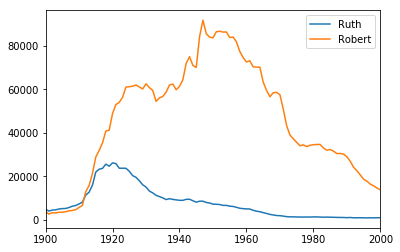

In [15]:
# задание 1
import matplotlib.pyplot as plt
import pandas as pd


def name_quantity():
    file_link = 'F:\\untitled\\years\\' # ссылка, которая у вас другая
    names_DataFrame = pd.DataFrame({'Ruth':[], 'Robert':[]}) # шаблон датафрейма
    
    for year in range(1900, 2001, 1): # период с 1900-2000гг
        names = pd.read_csv(file_link + 'yob' + str(year) + '.txt', header=None) 
        #  открытие файла с годом
        
        new_year = pd.DataFrame({'Ruth': [sum(names[names[0] == 'Ruth'][2].tolist())],
                                 'Robert': [sum(names[names[0] == 'Robert'][2].tolist())]}, index=pd.Series([year]))
        # информация о количестве двух имен в новом году
        names_DataFrame = pd.concat([names_DataFrame, new_year])
        # объеденение нового года со всеми остальными
    names_DataFrame.plot()
    # создаю график
    plt.show()
    # показываю график
name_quantity()


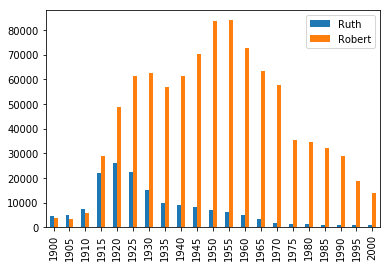

In [12]:
# задание 2 отличается от первого задания одной функцией и цифрой)
import matplotlib.pyplot as plt
import pandas as pd


def bar_statistics():
    file_link = 'F:\\untitled\\years\\'
    names_DataFrame = pd.DataFrame({'Ruth': [], 'Robert': []})

    for year in range(1900, 2001, 5): # отличие тут, т.к нужен не каждый год
        names = pd.read_csv(file_link + 'yob' + str(year) + '.txt', header=None)

        new_year = pd.DataFrame({'Ruth': [sum(names[names[0] == 'Ruth'][2].tolist())],
                                 'Robert': [sum(names[names[0] == 'Robert'][2].tolist())]}, index=pd.Series([year]))
        names_DataFrame = pd.concat([names_DataFrame, new_year])

    names_DataFrame.plot.bar() # и отличие тут, т.к. нужен другой график
    plt.show()

bar_statistics()

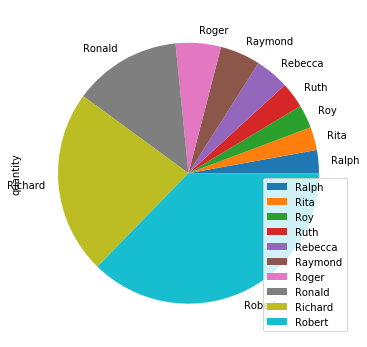

In [3]:
# задание 3
import matplotlib.pyplot as plt
import pandas as pd

def top10_for1950():
    file_link = 'F:\\untitled\\years\\yob1950.txt' # ссылка на файл
    names = pd.read_csv(file_link, names=['names', 'gender', 'quantity']) # открываю файл
    """
    А дальше я не понял, как можно быстро отсортировать имена с буквой R в начале, по-этому сделал цикл, 
    где прохожусь по всем элементам, проверяю на наличие первой буквы и создаю новый датафрейм
    """
    DataFrame_with_R = pd.DataFrame({'quantity': []})  
    for name, quantity in zip(names['names'], names['quantity']):
        if name[0] == 'R':
            new_name = pd.DataFrame({'quantity': [quantity]}, index=pd.Series([name]))
            DataFrame_with_R = pd.concat([DataFrame_with_R, new_name])
    DataFrame_with_R = DataFrame_with_R.sort_values('quantity').tail(10)
    DataFrame_with_R.plot.pie(y='quantity', figsize=(6, 6))
    plt.show()

top10_for1950()

Этот цикл выполнялся 543.4270823001862 сек


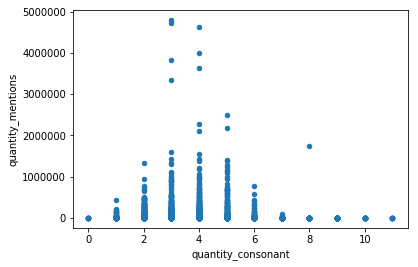

In [2]:
# номер 4. Получилось не очень оптимизировано...
import matplotlib.pyplot as plt
import pandas as pd
import re
import time

def name_quantity():
    file_link = 'F:\\untitled\\years\\'  # ссылка, которая у вас другая
    names_DataFrame = pd.DataFrame({'names': [], 'gender': [], 'quantity': []})  # шаблон датафрейма

    consonants = 'bcdfghjklmnpqrstvwxyz'
    for year in range(1900, 2001, 1):  # период с 1900-2000гг
        names = pd.read_csv(file_link + 'yob' + str(year) + '.txt', names=['names', 'gender', 'quantity'])
        names_DataFrame = pd.concat([names_DataFrame, names])

    names_DataFrame = names_DataFrame.groupby(['names', 'gender']).sum()
    """На этом моменте я соеденил все файлы в один ДатаФрейм и принял решение сделать еще один и информацией о согласных буквах
    и количестве упоминаний. По-моему оно было не самым удачным, потому что этот цикл выполнялся(будет написано в консоли). 
    Можно ли заставить код работать быстрее?"""
    consonant_quantity = pd.DataFrame({'quantity_consonant':[], 'quantity_mentions': []})
    start = time.time()
    for name, quantity in zip(names_DataFrame.index, names_DataFrame['quantity']):

        consonant_quantity = pd.concat([consonant_quantity,
                                       pd.DataFrame({'quantity_consonant': len(re.findall('[bcdfghjklmnpqrstvwxyz]', name[0], re.I)),
                                                     'quantity_mentions': quantity}, index=pd.Series([1]))])
    print('Этот цикл выполнялся', time.time() - start, 'сек')
    consonant_quantity.plot.scatter(x='quantity_consonant', y='quantity_mentions')
    plt.show()
    
name_quantity()



